#**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Jobaaj Projects/Python_Diwali_Sales_Analysis/Diwali Sales Data.csv', encoding='cp1252')

**To do list:**

*   Top 5 customers who spends a lot.
*   Product_ID  and Amount analysis
*   Group by Gender, Age- Group and Amount Analysis
*   Group by Gender, MaritalStatus and Amount Analysis
*   Name of the State and Zone spending lot
*   Product Category and Amount






# **Cleaning the data**

In [4]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Dropping the columns which is completly blank
df.drop(columns=['Status', 'unnamed1'], axis=1, inplace= True)

In [7]:
#dropping NA values in the dataframe
df.dropna(inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


# **Finding Top 5 Customers who spends less**

In [33]:
Cust_expense= df.groupby(['Cust_name'],as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
print(Cust_expense)

      Cust_name Age Group    Amount
2882   Vishakha     26-35  382782.0
2859    Vasudev     26-35  281034.0
1904      Neola     26-35  275234.0
1061      Gopal     36-45  239147.0
73    Alejandro     51-55  229748.0


/tmp/ipython-input-2138180355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= Cust_expense, x= 'Cust_name', y='Amount', palette= 'Set2')


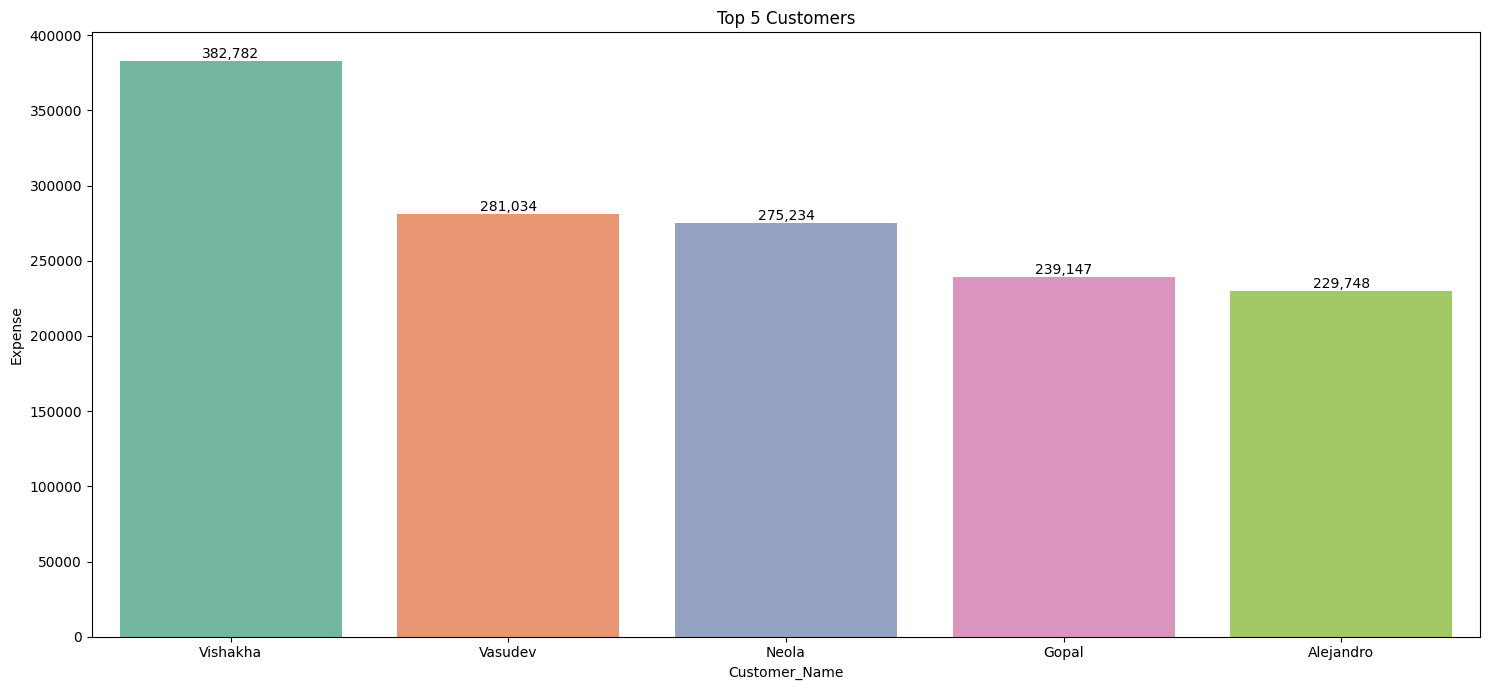

In [39]:
plt.figure(figsize= (15,7))
ax= sns.barplot(data= Cust_expense, x= 'Cust_name', y='Amount', palette= 'Set2')

for bars in ax.containers:
  ax.bar_label(bars, fmt= '{:,.0f}')

plt.title("Top 5 Customers")
plt.xlabel('Customer_Name')
plt.tight_layout()
plt.ylabel('Expense')

plt.show()

**Concluson**- This shows the name of customer who have spend lot.

#**Age Group**

In [104]:
Age_count= df['Age Group'].value_counts().sort_values(ascending= False).reset_index()
print("Age_count")
display(Age_count)

Age_count


,Age Group,count
0,26-35,4541
1,36-45,2283
2,18-25,1879
3,46-50,983
4,51-55,830
5,55+,427
6,0-17,296


/tmp/ipython-input-895432313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data= Age_count, x= 'Age Group', y= 'count', palette= 'Set2')


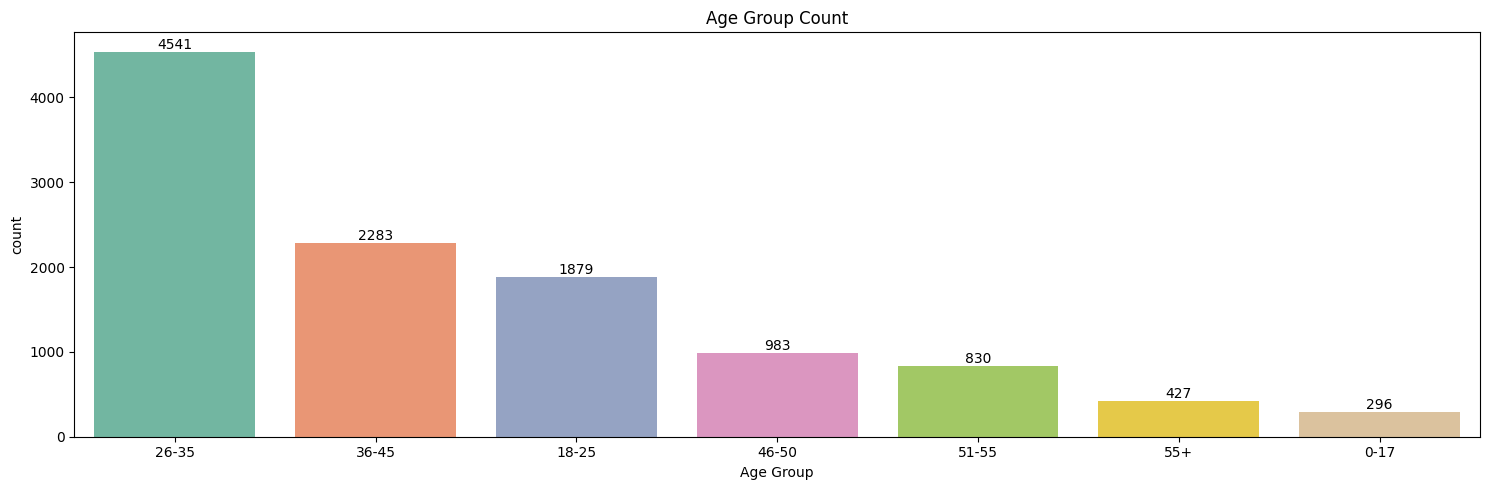

In [64]:
plt.figure(figsize=(15,5))

ax=sns.barplot(data= Age_count, x= 'Age Group', y= 'count', palette= 'Set2')

for bars in ax.containers:
  ax.bar_label(bars)

plt.title("Age Group Count")
plt.tight_layout()
plt.show()

Expense_by_AgeGrp


,index,Gender,Age Group,Amount
0,2,F,26-35,"30,963,955"
1,3,F,36-45,"15,509,957"
2,1,F,18-25,"11,887,003"
3,9,M,26-35,"11,649,489"
4,4,F,46-50,"6,743,393"
5,10,M,36-45,"6,635,038"
6,5,F,51-55,"5,385,208"
7,8,M,18-25,"5,353,729"
8,12,M,51-55,"2,876,269"
9,11,M,46-50,"2,464,451"


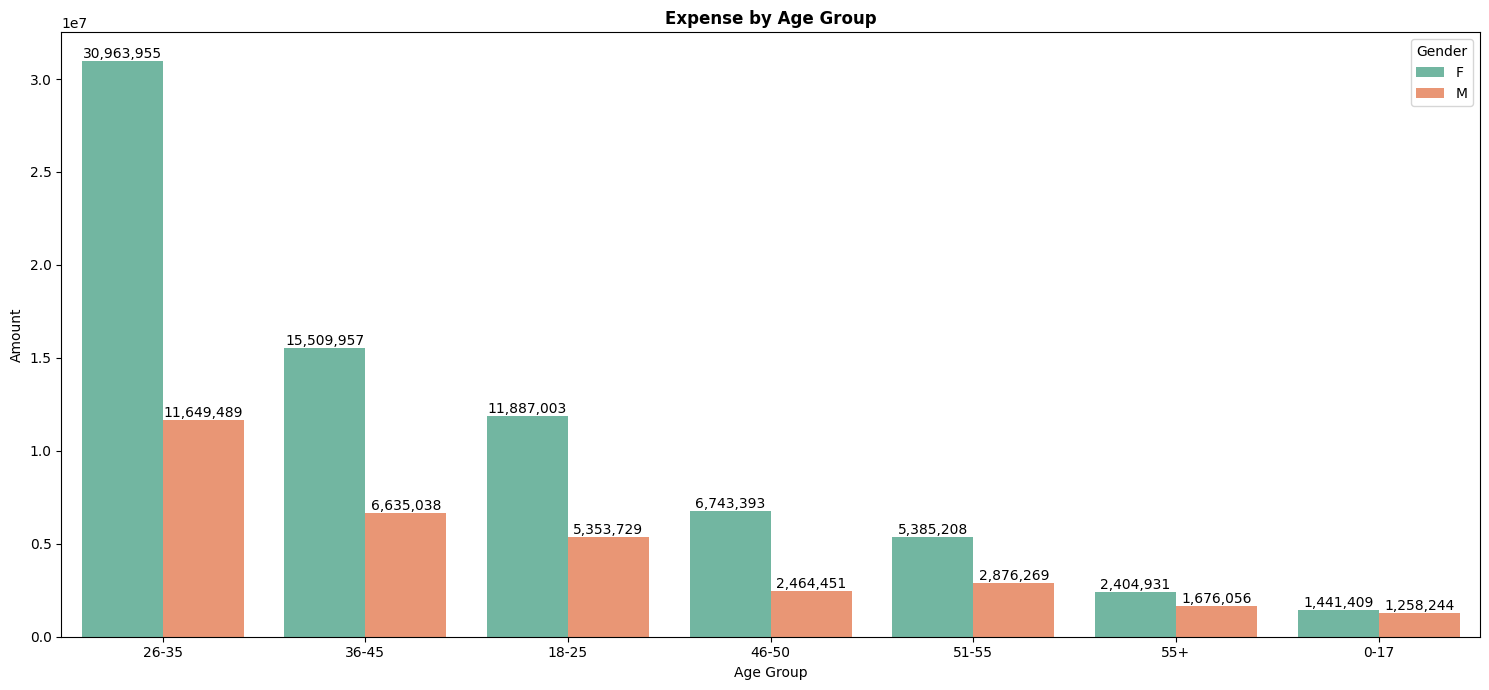

In [116]:
Expense_by_AgeGrp= df.groupby(['Gender', 'Age Group'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).reset_index()
print('Expense_by_AgeGrp')
display(Expense_by_AgeGrp.style.format({'Amount':'{:,.0f}'}))

plt.figure(figsize=(15,7))
ax= sns.barplot(data= Expense_by_AgeGrp, x= 'Age Group', hue= 'Gender', y= 'Amount', palette= 'Set2')

for bars in ax.containers:
  ax.bar_label(bars, fmt= '{:,.0f}')

plt.title('Expense by Age Group', fontweight= 'bold')
plt.tight_layout()
plt.show()


**Conclusion**

* Age Group Distribution: The largest group of customers falls within
the 26-35 age range, followed by 36-45 and 18-25. The age groups 0-17 and 55+ have the fewest customers.
* Spending by Age Group: The 26-35 age group contributes the most to the total revenue, followed by the 36-45 and 18-25 age groups.
* Spending by Gender within Age Groups: In most age groups, females tend to spend more than males. The 26-35 female age group is the highest spending segment overall.
In conclusion, the 26-35 age group is the most important demographic for sales, both in terms of customer count and total spending, with females in this group being particularly high spenders.

**Top 5 Product Categories by Revenue (Gender Breakdown):**

# **Expense based on Gender**

In [11]:
#Finding out the null value in Gender column
df['Gender'].isnull().sum()

np.int64(0)

  Gender  count
0      F   7832
1      M   3407


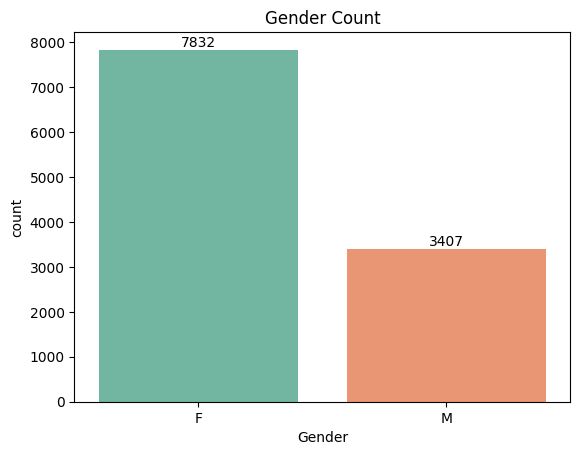

In [12]:
Gender_count = df['Gender'].value_counts().reset_index()
print(Gender_count)

ax= sns.barplot(data= Gender_count, x='Gender',hue= 'Gender', y='count', legend= False, palette='Set2')

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Gender Count')
plt.show()

In [13]:
Gender_expense= df.groupby('Gender', as_index= True)['Amount'].sum().sort_values(ascending= False). reset_index()
print(Gender_expense)

  Gender       Amount
0      F  74335856.43
1      M  31913276.00


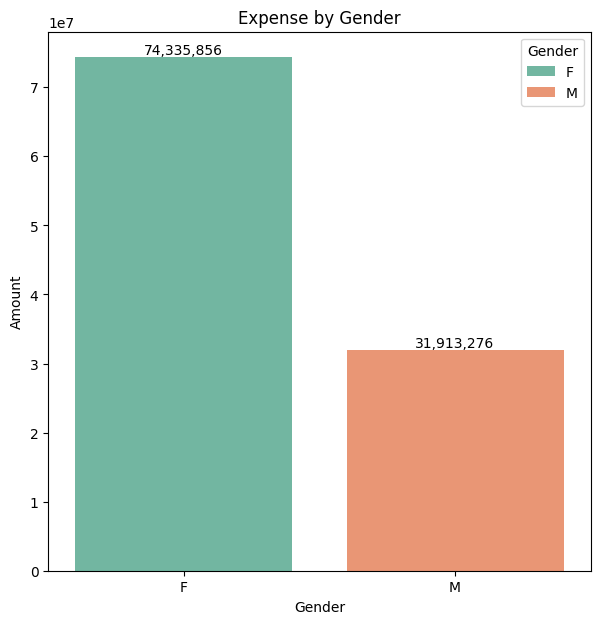

In [66]:
plt.figure(figsize=(7,7))

ax= sns.barplot(data= Gender_expense, x= 'Gender', y='Amount',hue= 'Gender', legend= True,palette= 'Set2')

for bars in ax.containers:
  ax.bar_label(bars, fmt= '{:,.0f}')

plt.title('Expense by Gender')
plt.show()

In [15]:
Revenue= df.groupby(['Gender', 'Age Group'])['Amount'].sum().reset_index()
print(Revenue)

   Gender Age Group       Amount
0       F      0-17   1441409.00
1       F     18-25  11887003.00
2       F     26-35  30963954.94
3       F     36-45  15509957.49
4       F     46-50   6743393.00
5       F     51-55   5385208.00
6       F       55+   2404931.00
7       M      0-17   1258244.00
8       M     18-25   5353729.00
9       M     26-35  11649489.00
10      M     36-45   6635038.00
11      M     46-50   2464451.00
12      M     51-55   2876269.00
13      M       55+   1676056.00


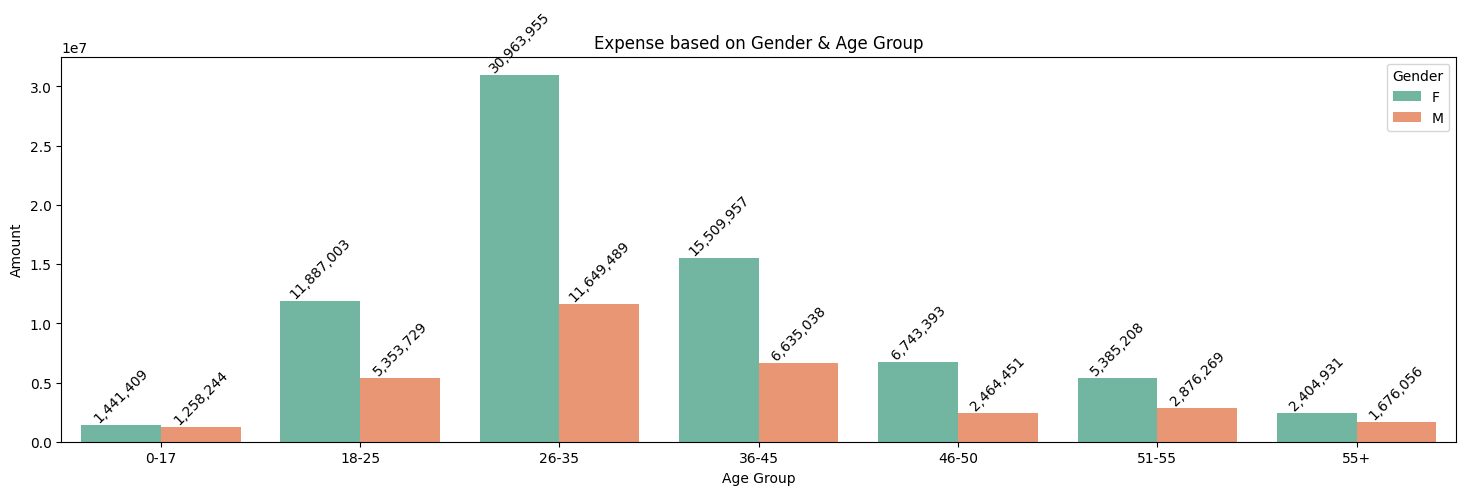

In [16]:
plt.figure(figsize= (18,5))
ax= sns.barplot(data= Revenue, x= 'Age Group', y= 'Amount', hue= 'Gender', palette= 'Set2')

for bars in ax.containers:
  ax.bar_label(bars, fmt= '{:,.0f}', rotation= 45)

plt.title('Expense based on Gender & Age Group')
plt.show()

**Conclusion**-
*   Female= 7832, Male= 3407
*   Female has spend more compared to Male.
* And the age-group of 26-35 has spend more.



# **STATE & ZONE**

In [17]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [18]:
State_Revenue= df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by= "Amount",ascending= False).head(5).reset_index()
print(State_Revenue)

   index           State       Amount
0     14   Uttar Pradesh  19374968.00
1     10     Maharashtra  14427543.00
2      7       Karnataka  13523540.00
3      2           Delhi  11603819.45
4      9  Madhya Pradesh   8101142.00


/tmp/ipython-input-2700337055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= State_Revenue, x= 'State', y= 'Amount',palette= 'Set2')


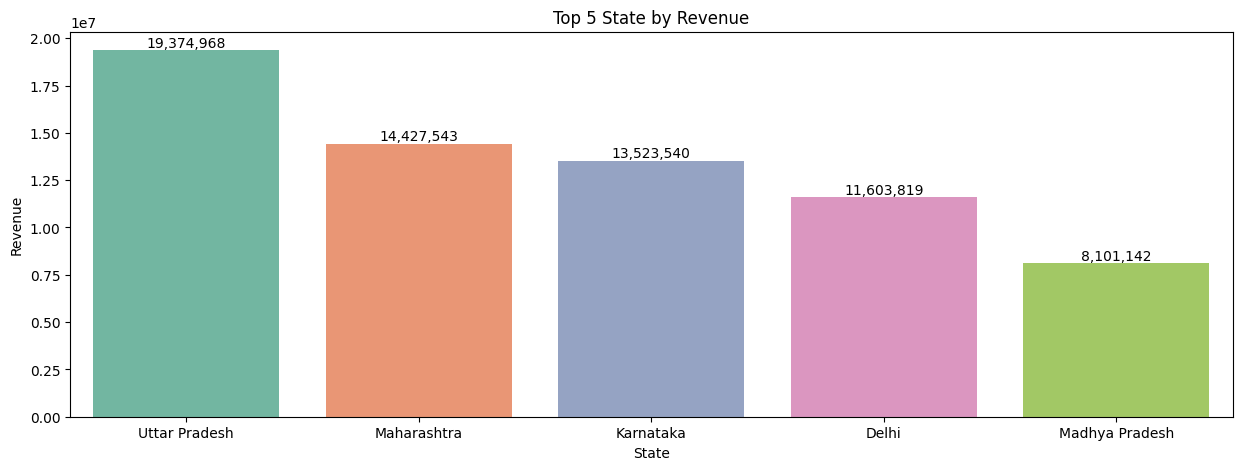

In [19]:
plt.figure(figsize=(15,5))

ax= sns.barplot(data= State_Revenue, x= 'State', y= 'Amount',palette= 'Set2')

for bars in ax.containers:
  ax.bar_label(bars,fmt= '{:,.0f}')

plt.xlabel('State')
plt.ylabel('Revenue')
plt.title('Top 5 State by Revenue')
plt.show()


In [20]:
Zonal_revenue= df.groupby('Zone',as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).reset_index()
print(Zonal_revenue)

   index      Zone       Amount
0      0   Central  41600873.45
1      3  Southern  26606668.98
2      4   Western  18373625.00
3      2  Northern  12618752.00
4      1   Eastern   7049213.00


/tmp/ipython-input-3851220147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data= Zonal_revenue, y= 'Amount',x='Zone', legend= True,palette= 'Set2', errorbar= None)


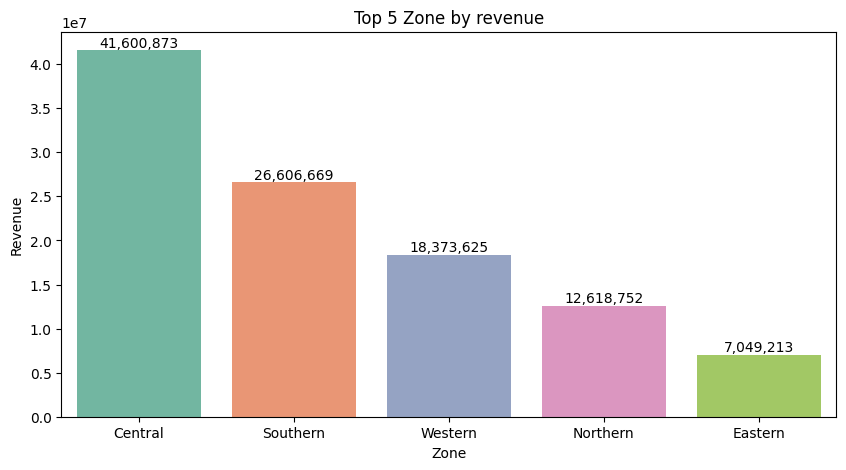

In [21]:
plt.figure(figsize= (10,5))
ax=sns.barplot(data= Zonal_revenue, y= 'Amount',x='Zone', legend= True,palette= 'Set2', errorbar= None)

for bars in ax.containers:
  ax.bar_label(bars, fmt= '{:,.0f}')

plt.ylabel('Revenue')
plt.title('Top 5 Zone by revenue')
plt.show()

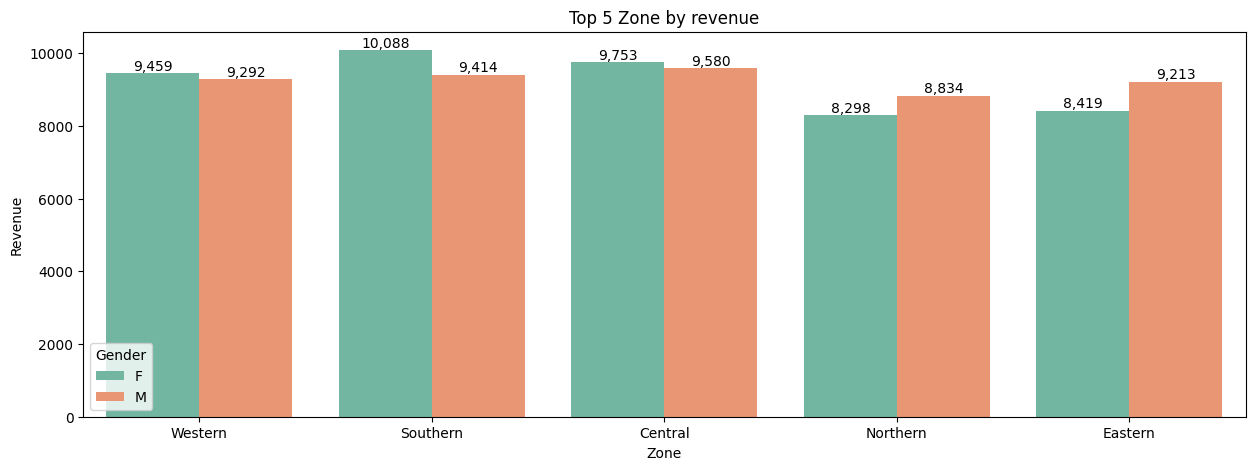

In [22]:
plt.figure(figsize= (15,5))
ax=sns.barplot(data= df, hue= 'Gender', y= 'Amount',x='Zone', legend= True,palette= 'Set2', errorbar= None)

for bars in ax.containers:
  ax.bar_label(bars, fmt= '{:,.0f}')

plt.ylabel('Revenue')
plt.title('Top 5 Zone by revenue')
plt.show()

**Conclusion**-

* Highest revenue earning zone- Central
* Highest revenue generating State- UttarPradesh
* Male from Southern Zone spends more compared to rest and female from Central Zone spends more.



# **Revenue by Prodduct ID and Category**

In [23]:
df['Product_ID'].nunique()

2350

Product_count


,Product_ID,count
0,P00265242,53
1,P00110942,44
2,P00184942,37
3,P00237542,35
4,P00112142,34


/tmp/ipython-input-3761395065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= Product_count, x= 'Product_ID', y ='count', palette='Set2')


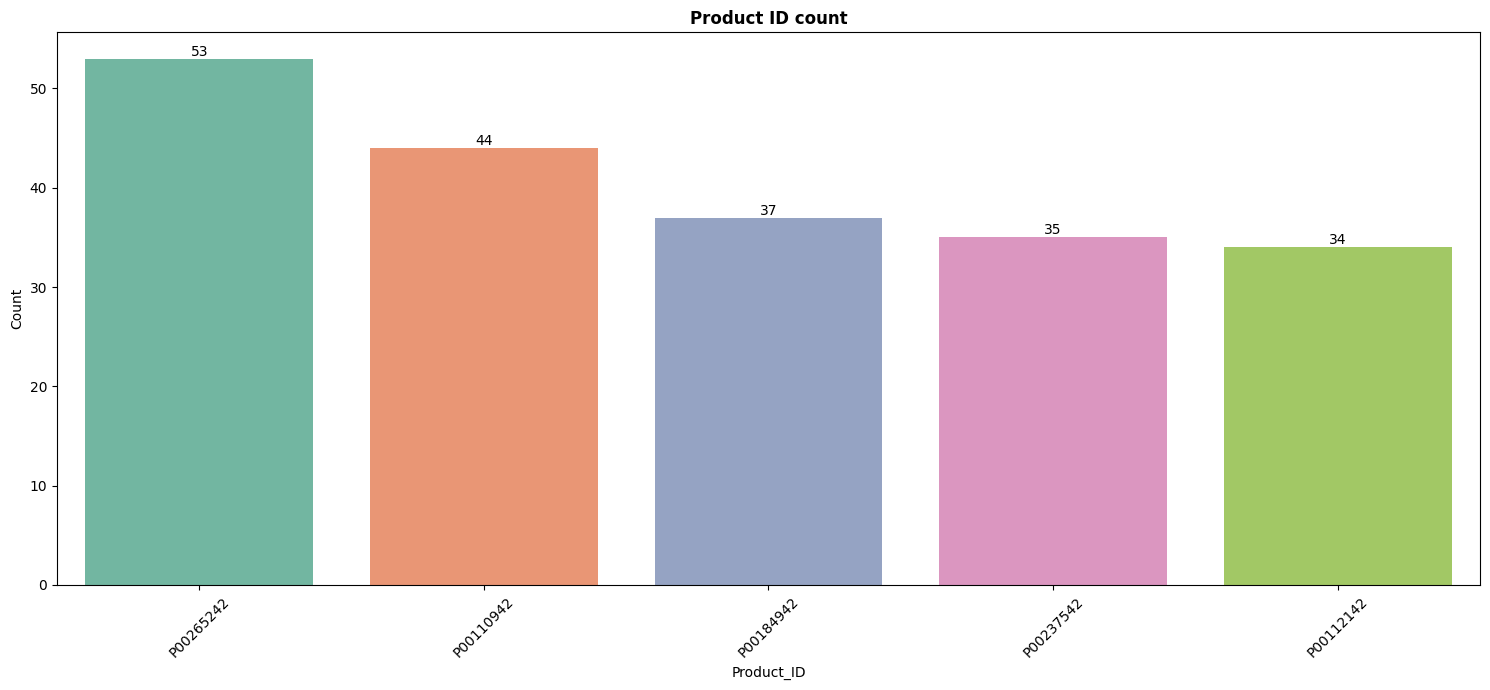

In [124]:
plt.figure(figsize=(15,7))
Product_count= df['Product_ID'].value_counts().reset_index().head(5)
print('Product_count')
display(Product_count.style.format({'count':'{:,}'}))

ax= sns.barplot(data= Product_count, x= 'Product_ID', y ='count', palette='Set2')

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Product ID count',fontweight= 'bold')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

  Product_ID  Amount
0  P00296942   370.0
1  P00044742   396.0
2  P00307142   572.0
3  P00121942   744.0
4  P00216242   748.0


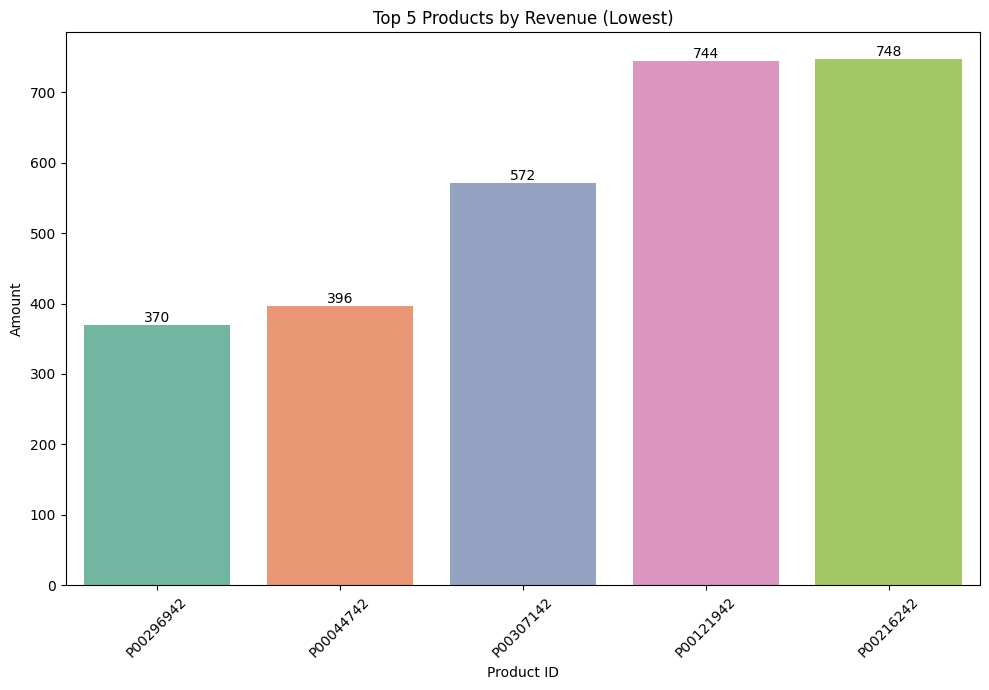

In [25]:
plt.figure(figsize= (10,7))
Revenue_by_product= df.groupby('Product_ID')['Amount'].sum().sort_values(ascending= True).reset_index().head(5)
print(Revenue_by_product)

ax= sns.barplot(data= Revenue_by_product, x= 'Product_ID', y= 'Amount', hue= 'Product_ID', legend=False, palette= 'Set2')

for bars in ax.containers:
  ax.bar_label(bars, fmt='{:,.0f}')

plt.title('Top 5 Products by Revenue (Lowest)')
plt.xlabel('Product ID')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
df['Product_Category'].unique()

18

In [98]:
Product_Category_Gender = df.groupby(['Product_Category', 'Gender'])['Amount'].sum().sort_values(ascending=False).head(5).reset_index()
print("Top 5 Product Categories by Revenue (Gender Breakdown):")
display(Product_Category_Gender.style.format({'Amount': '{:,.0f}'}))

Top 5 Product Categories by Revenue (Gender Breakdown):


,Product_Category,Gender,Amount
0,Food,F,"24,176,102"
1,Footwear & Shoes,F,"11,534,547"
2,Clothing & Apparel,F,"11,479,103"
3,Electronics & Gadgets,F,"11,033,097"
4,Food,M,"9,757,781"


In [100]:
Product_Category= df.groupby(['Product_Category'])['Amount'].sum().sort_values(ascending= False).head(5).reset_index()
print("Top 5 Product Category")
display(Product_Category.style.format({'Amount':'{:,.0f}'}))

Top 5 Product Category


,Product_Category,Amount
0,Food,"33,933,884"
1,Clothing & Apparel,"16,495,019"
2,Electronics & Gadgets,"15,643,846"
3,Footwear & Shoes,"15,575,209"
4,Furniture,"5,440,052"


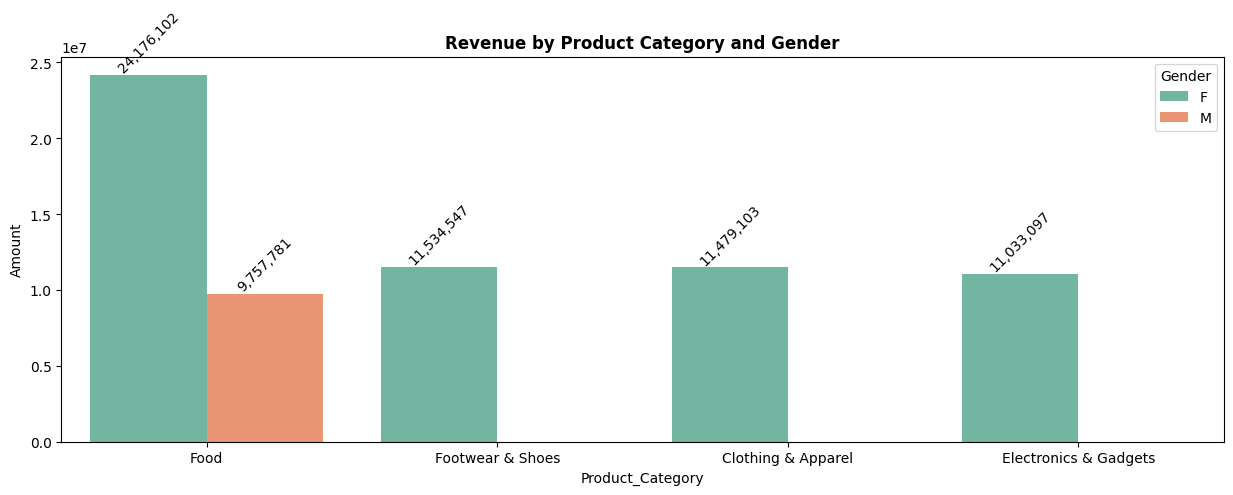

In [101]:
plt.figure(figsize= (15,5))
ax= sns.barplot(data=Product_Category_Gender,x= 'Product_Category', y= 'Amount', hue= 'Gender', palette= 'Set2')

for bars in ax.containers:
  ax.bar_label(bars, fmt= '{:,.0f}', rotation= 45)
plt.title('Revenue by Product Category and Gender', fontweight='bold')
plt.show()